In [2]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 10.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 12.0 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e6a45e480e8befa449857545c5e32012120c3cacc8813704c8dea07b87bd6549
  Stored in directory: /Users/ben/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [6]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 3.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/ben/Desktop/DISSERTATION/github/dissertation2022/captionedcliprankedsemanticsimilaritycalculated.csv')
df.columns.tolist()
df = df[df['VizEntailment'] != 'Server error']
df.groupby(['VizEntailment'])['VizEntailment'].count()

VizEntailment
C     3
E    78
N    42
Name: VizEntailment, dtype: int64

In [11]:
import re
print(df['headlineandOFA'][0])
splittedup = re.split('\'',df['headlineandOFA'][0])
relation = splittedup[1]
scoree = re.split(' ', splittedup[3])
score = re.split('%', scoree[1])
print(relation)
print(float(score[0]))


('contradiction', ' 0.78%')
contradiction
0.78


In [16]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'category', 'headline', 'authors', 'link',
       'short descr', 'date', 'labelexplain', 'VizEntailment',
       'image_caption(s)', 'image_link(s)', 'OFAcaption', 'Headline',
       'Short_descr', 'Image_Caption(s)', 'OFACAPTION',
       'headlineandshortdescr', 'shortdescrncaption', 'headlineandcaption',
       'headlineandOFA', 'shortdescrandOFA', 'actualcaptionandOFA'],
      dtype='object')

In [36]:
finaldf = df[['category', 'headline','authors','link','short descr','date','VizEntailment','image_caption(s)', 'image_link(s)', 'Headline','Short_descr','Image_Caption(s)','OFACAPTION']]
bert = []
sem = ['headlineandshortdescr', 'headlineandcaption',
       'headlineandOFA', 'shortdescrncaption','shortdescrandOFA',
       'actualcaptionandOFA']
for i, row in df.iterrows():
    col = []
    for j in sem:
#         print(j)
        splittedup = re.split('\'',row[j])
        print(row[j])
        relation = splittedup[1]
        scoree = re.split(' ', splittedup[3])
        score = re.split('%', scoree[1])
        col.append(relation)
        col.append(float(score[0]))
    bert.append(col)

    

('contradiction', ' 0.52%')
('contradiction', ' 0.82%')
('contradiction', ' 0.78%')
('contradiction', ' 0.70%')
('contradiction', ' 0.73%')
('contradiction', ' 0.80%')
('neutral', ' 0.80%')
('neutral', ' 0.66%')
('contradiction', ' 0.58%')
('contradiction', ' 0.87%')
('contradiction', ' 0.65%')
('contradiction', ' 0.77%')
('neutral', ' 0.65%')
('contradiction', ' 0.63%')
('contradiction', ' 0.77%')
('contradiction', ' 0.64%')
('contradiction', ' 0.69%')
('contradiction', ' 0.71%')
('neutral', ' 0.72%')
('neutral', ' 0.87%')
('contradiction', ' 0.73%')
('neutral', ' 0.84%')
('contradiction', ' 0.69%')
('contradiction', ' 0.72%')
('contradiction', ' 0.50%')
('neutral', ' 0.82%')
('contradiction', ' 0.67%')
('neutral', ' 0.63%')
('contradiction', ' 0.57%')
('contradiction', ' 0.71%')
('neutral', ' 0.72%')
('neutral', ' 0.82%')
('contradiction', ' 0.83%')
('neutral', ' 0.80%')
('contradiction', ' 0.67%')
('contradiction', ' 0.75%')
('neutral', ' 0.90%')
('neutral', ' 0.93%')
('contradictio

In [37]:
bert

[['contradiction',
  0.52,
  'contradiction',
  0.82,
  'contradiction',
  0.78,
  'contradiction',
  0.7,
  'contradiction',
  0.73,
  'contradiction',
  0.8],
 ['neutral',
  0.8,
  'neutral',
  0.66,
  'contradiction',
  0.58,
  'contradiction',
  0.87,
  'contradiction',
  0.65,
  'contradiction',
  0.77],
 ['neutral',
  0.65,
  'contradiction',
  0.63,
  'contradiction',
  0.77,
  'contradiction',
  0.64,
  'contradiction',
  0.69,
  'contradiction',
  0.71],
 ['neutral',
  0.72,
  'neutral',
  0.87,
  'contradiction',
  0.73,
  'neutral',
  0.84,
  'contradiction',
  0.69,
  'contradiction',
  0.72],
 ['contradiction',
  0.5,
  'neutral',
  0.82,
  'contradiction',
  0.67,
  'neutral',
  0.63,
  'contradiction',
  0.57,
  'contradiction',
  0.71],
 ['neutral',
  0.72,
  'neutral',
  0.82,
  'contradiction',
  0.83,
  'neutral',
  0.8,
  'contradiction',
  0.67,
  'contradiction',
  0.75],
 ['neutral',
  0.9,
  'neutral',
  0.93,
  'contradiction',
  0.61,
  'neutral',
  0.63,
  'c

In [21]:
l = [['Headline','Short Description','Semantic Similarity Relation', 'HSR'],
    ['Headline','Actual Caption','Semantic Similarity Relation', 'HAR'],
    ['Headline','OFA Generated Caption','Semantic Similarity Relation', 'HOR'],
     ['Headline','Short Description','Semantic Similarity Score', 'HSS'],
    ['Headline','Actual Caption','Semantic Similarity Score', 'HAS'],
    ['Headline','OFA Generated Caption','Semantic Similarity Score', 'HOS'],
    
    ['Short Description','Actual Caption','Semantic Similarity Relation', 'SAR'],
    ['Short Description','OFA Generated Caption','Semantic Similarity Relation', 'SOR'],
    
    ['Short Description','Actual Caption','Semantic Similarity Score', 'SAS'],
    ['Short Description','OFA Generated Caption','Semantic Similarity Score', 'SOS'],
     
     
    ['Actual Caption','OFA Generated Caption','Semantic Similarity Relation', 'AOR'],
    ['Actual Caption','OFA Generated Caption','Semantic Similarity Score', 'AOS']
    
    
    ]

theheadings = pd.DataFrame(l, columns=['Text1','Text2', 'Semantic Similarity Relation/Score', 'Code'])
theheadings

,Text1,Text2,Semantic Similarity Relation/Score,Code
0,Headline,Short Description,Semantic Similarity Relation,HSR
1,Headline,Actual Caption,Semantic Similarity Relation,HAR
2,Headline,OFA Generated Caption,Semantic Similarity Relation,HOR
3,Headline,Short Description,Semantic Similarity Score,HSS
4,Headline,Actual Caption,Semantic Similarity Score,HAS
5,Headline,OFA Generated Caption,Semantic Similarity Score,HOS
6,Short Description,Actual Caption,Semantic Similarity Relation,SAR
7,Short Description,OFA Generated Caption,Semantic Similarity Relation,SOR
8,Short Description,Actual Caption,Semantic Similarity Score,SAS
9,Short Description,OFA Generated Caption,Semantic Similarity Score,SOS


In [46]:
be_rt = pd.DataFrame(bert, columns=['HSR','HSS','HAR','HAS','HOR','HOS',
                                    'SAR','SAS','SOR','SOS','AOR','AOS'])
# be_rt = pd.DataFrame(bert)


In [47]:
be_rt

,HSR,HSS,HAR,HAS,HOR,HOS,SAR,SAS,SOR,SOS,AOR,AOS
0,contradiction,0.52,contradiction,0.82,contradiction,0.78,contradiction,0.70,contradiction,0.73,contradiction,0.80
1,neutral,0.80,neutral,0.66,contradiction,0.58,contradiction,0.87,contradiction,0.65,contradiction,0.77
2,neutral,0.65,contradiction,0.63,contradiction,0.77,contradiction,0.64,contradiction,0.69,contradiction,0.71
3,neutral,0.72,neutral,0.87,contradiction,0.73,neutral,0.84,contradiction,0.69,contradiction,0.72
4,contradiction,0.50,neutral,0.82,contradiction,0.67,neutral,0.63,contradiction,0.57,contradiction,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...
118,neutral,0.59,neutral,0.86,contradiction,0.81,neutral,0.88,contradiction,0.78,contradiction,0.75
119,contradiction,0.39,contradiction,0.53,contradiction,0.73,contradiction,0.51,contradiction,0.62,contradiction,0.62
120,neutral,0.47,neutral,0.64,contradiction,0.75,neutral,0.60,contradiction,0.80,contradiction,0.73
121,contradiction,0.78,neutral,0.76,contradiction,0.82,contradiction,0.71,contradiction,0.77,contradiction,0.80


In [48]:
finale = pd.concat([finaldf, be_rt], axis=1)

In [30]:
be_rt.shape

(123, 12)

In [49]:
finale.to_csv('captionedrankedsemnaticseparated.csv')

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# clf.fit(df[['Headline','Short_descr','Image_Caption(s)','OFACAPTION','headlineandcaption','headlineandOFA', 'shortdescrandOFA','shortdescrncaption','actualcaptionandOFA']], df[['VizEntailment']])
clf.fit(df[['Headline','Image_Caption(s)','OFACAPTION']][0:100], df[['VizEntailment']][0:100])

DecisionTreeClassifier()

In [23]:
%matplotlib notebook

[Text(0.5336538461538461, 0.9666666666666667, 'X[1] <= 0.001\ngini = 0.481\nsamples = 123\nvalue = [3, 78, 42]'),
 Text(0.2980769230769231, 0.9, 'X[3] <= 0.0\ngini = 0.398\nsamples = 64\nvalue = [1, 47, 16]'),
 Text(0.25961538461538464, 0.8333333333333334, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.33653846153846156, 0.8333333333333334, 'X[1] <= 0.0\ngini = 0.438\nsamples = 55\nvalue = [1, 38, 16]'),
 Text(0.2980769230769231, 0.7666666666666667, 'X[1] <= 0.0\ngini = 0.476\nsamples = 47\nvalue = [1, 30, 16]'),
 Text(0.25961538461538464, 0.7, 'X[0] <= 0.003\ngini = 0.447\nsamples = 44\nvalue = [1, 30, 13]'),
 Text(0.07692307692307693, 0.6333333333333333, 'X[2] <= 1.0\ngini = 0.245\nsamples = 14\nvalue = [0, 12, 2]'),
 Text(0.038461538461538464, 0.5666666666666667, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.11538461538461539, 0.5666666666666667, 'X[0] <= 0.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 1\

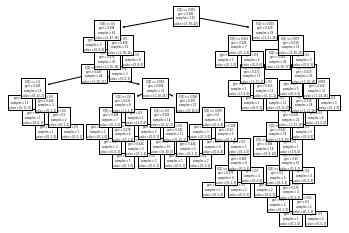

In [9]:
tree.plot_tree(clf)

In [41]:
predictions = clf.predict(df[['Headline','Image_Caption(s)','OFACAPTION']][100:124])

In [36]:
predictions[0]

'E'

In [42]:
dff = df[['VizEntailment']][100:124]
count = 0
for i in range(len(dff)):
    if(predictions[i] == dff.iloc[i][0]):
        count = count + 1

In [43]:
count

7

3.53184410915098


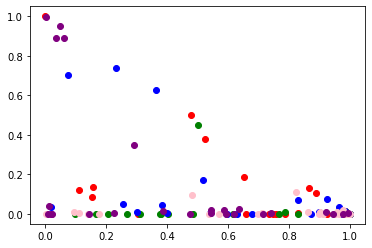

In [7]:
figure, ax = plt.subplots()


from sklearn.preprocessing import MinMaxScaler 
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Headline','Short_descr', 'Image_Caption(s)','OFACAPTION']]) 
print(km.inertia_) 
#sse.append(km.inertia_) df['alloftheabove'] = y_predicted
df1 = df[df['category']=='CRIME'] 
df2 = df[df['category']=='ENTERTAINMENT'] 
df3 = df[df['category']=='POLITICS'] 
df4 = df[df['category']=='SPORTS'] 
df5 = df[df['category']=='WOMEN']
# ax = plt.axes(projection='3d')

# ax.scatter3D(df1['Headline'], df1['Image_Caption(s)'], df1['OFACAPTION'], cmap='Red')
# ax.scatter3D(df2['Headline'], df2['Image_Caption(s)'], df2['OFACAPTION'], cmap='Green')
# ax.scatter3D(df3['Headline'], df3['Image_Caption(s)'], df3['OFACAPTION'], cmap='Blue')
# ax.scatter3D(df4['Headline'], df4['Image_Caption(s)'], df4['OFACAPTION'], cmap='Pink')
# ax.scatter3D(df5['Headline'], df5['Image_Caption(s)'], df5['OFACAPTION'], cmap='Purple')

# ax.set_xlabel('Headline CLIP score')
# ax.set_ylabel('Image Caption CLIP score')
# ax.set_zlabel('OFA caption CLIP score')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
#plt.xlabel('gmean')
#plt.ylabel('mean')
# plt.show()

ax.scatter(df1['Image_Caption(s)'], df1['OFACAPTION'], color='Red')
ax.scatter(df2['Image_Caption(s)'], df2['OFACAPTION'], color='Green')
ax.scatter(df3['Image_Caption(s)'], df3['OFACAPTION'], color='Blue')
ax.scatter(df4['Image_Caption(s)'], df4['OFACAPTION'], color='Pink')
ax.scatter(df5['Image_Caption(s)'], df5['OFACAPTION'], color='Purple')
plt.show()
#this is for saving the image as a high resolution svg file. Again, nothing would have been possible
# without StackOverflow figure.savefig('C:/Users/ben/Desktop/images/svg/3dpicturesentropy.svg', format='svg', dpi=1200)

In [6]:
y_predicted

array([1, 3, 1, 4, 0, 0, 1, 0, 4, 1, 0, 0, 1, 4, 1, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 4, 3, 3, 0, 1, 0, 4, 0, 4, 0, 0, 3, 0, 0,
       0, 4, 0, 1, 0, 1, 4, 1, 0, 2, 1, 4, 0, 0, 1, 4, 1, 0, 3, 1, 0, 0,
       2, 2, 0, 4, 0, 4, 4, 1, 1, 2, 1, 0, 0, 4, 1, 2, 0, 0, 4, 4, 0, 3,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 4, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 3, 0,
       4, 3, 4, 0, 0, 3, 0, 1, 4, 2, 0, 1, 0, 4], dtype=int32)

In [66]:
import re
print(df['headlineandOFA'][0])
splittedup = re.split('\'',df['headlineandOFA'][0])
relation = splittedup[1]
score = re.split(' ', splittedup[3])
print(relation)
print(score[1])

('contradiction', ' 0.78%')
contradiction
0.78%


2.7864874550400875


[Text(0.5, 1.0, 'Clustering based on the Actual and Generated Caption Similarity ')]

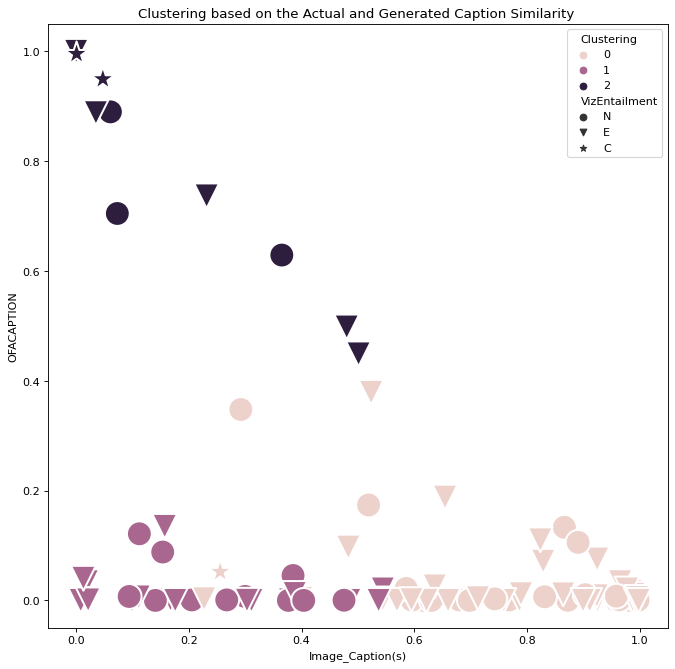

In [46]:
import seaborn as sns
# figure, ax = plt.subplots()
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler 
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['OFACAPTION','Headline']]) 
print(km.inertia_) 
df['Clustering'] = y_predicted

fig = figure(figsize=(10,10), dpi=80)
sns.scatterplot(data=df, x="Image_Caption(s)", y="OFACAPTION", style="VizEntailment", markers=['o', 'v', '*'], hue="Clustering", s=500).set(title="Clustering based on the Actual and Generated Caption Similarity ")


#sse.append(km.inertia_) df['alloftheabove'] = y_predicted
# df1 = df[df['category']=='CRIME'] 
# df2 = df[df['category']=='ENTERTAINMENT'] 
# df3 = df[df['category']=='POLITICS'] 
# df4 = df[df['category']=='SPORTS'] 
# df5 = df[df['category']=='WOMEN']
# ax = plt.axes(projection='3d')

# ax.scatter3D(df1['Headline'], df1['Image_Caption(s)'], df1['OFACAPTION'], cmap='Red')
# ax.scatter3D(df2['Headline'], df2['Image_Caption(s)'], df2['OFACAPTION'], cmap='Green')
# ax.scatter3D(df3['Headline'], df3['Image_Caption(s)'], df3['OFACAPTION'], cmap='Blue')
# ax.scatter3D(df4['Headline'], df4['Image_Caption(s)'], df4['OFACAPTION'], cmap='Pink')
# ax.scatter3D(df5['Headline'], df5['Image_Caption(s)'], df5['OFACAPTION'], cmap='Purple')

# ax.set_xlabel('Headline CLIP score')
# ax.set_ylabel('Image Caption CLIP score')
# ax.set_zlabel('OFA caption CLIP score')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
#plt.xlabel('gmean')
#plt.ylabel('mean')
# plt.show()

# ax.scatter(df1['Image_Caption(s)'], df1['OFACAPTION'], color='Red')
# ax.scatter(df2['Image_Caption(s)'], df2['OFACAPTION'], color='Green')
# ax.scatter(df3['Image_Caption(s)'], df3['OFACAPTION'], color='Blue')
# ax.scatter(df4['Image_Caption(s)'], df4['OFACAPTION'], color='Pink')
# ax.scatter(df5['Image_Caption(s)'], df5['OFACAPTION'], color='Purple')
# plt.show()
#this is for saving the image as a high resolution svg file. Again, nothing would have been possible
# without StackOverflow figure.savefig('C:/Users/ben/Desktop/images/svg/3dpicturesentropy.svg', format='svg', dpi=1200)

8.837625196295555


[Text(0.5, 1.0, 'Clustering based on the Actual and Generated Caption Similarity ')]

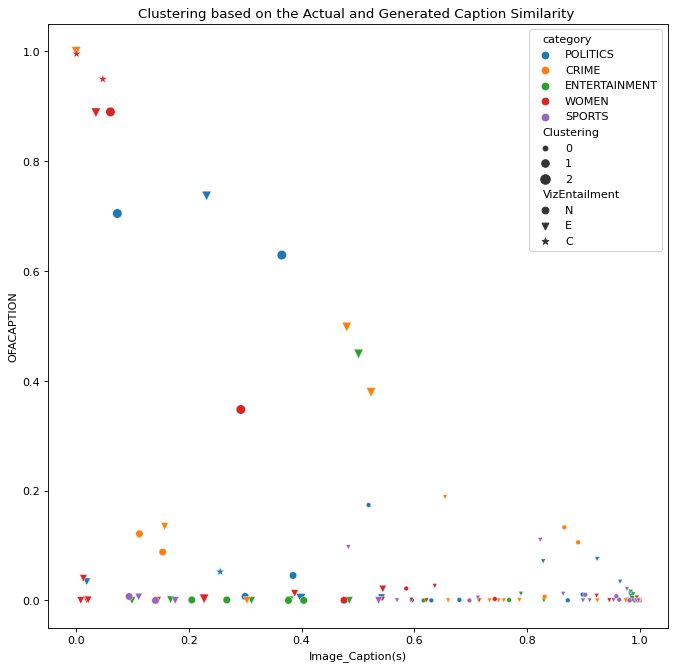

In [15]:
import seaborn as sns
# figure, ax = plt.subplots()
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler 
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Headline','Short_descr', 'Image_Caption(s)','OFACAPTION']]) 
print(km.inertia_) 
df['Clustering'] = y_predicted

fig = figure(figsize=(10,10), dpi=80)
sns.scatterplot(data=df, x="Image_Caption(s)", y="OFACAPTION", style="VizEntailment", size='Clustering', markers=['o', 'v', '*'], hue="category", s=500).set(title="Clustering based on the Actual and Generated Caption Similarity ")


#sse.append(km.inertia_) df['alloftheabove'] = y_predicted
# df1 = df[df['category']=='CRIME'] 
# df2 = df[df['category']=='ENTERTAINMENT'] 
# df3 = df[df['category']=='POLITICS'] 
# df4 = df[df['category']=='SPORTS'] 
# df5 = df[df['category']=='WOMEN']
# ax = plt.axes(projection='3d')

# ax.scatter3D(df1['Headline'], df1['Image_Caption(s)'], df1['OFACAPTION'], cmap='Red')
# ax.scatter3D(df2['Headline'], df2['Image_Caption(s)'], df2['OFACAPTION'], cmap='Green')
# ax.scatter3D(df3['Headline'], df3['Image_Caption(s)'], df3['OFACAPTION'], cmap='Blue')
# ax.scatter3D(df4['Headline'], df4['Image_Caption(s)'], df4['OFACAPTION'], cmap='Pink')
# ax.scatter3D(df5['Headline'], df5['Image_Caption(s)'], df5['OFACAPTION'], cmap='Purple')

# ax.set_xlabel('Headline CLIP score')
# ax.set_ylabel('Image Caption CLIP score')
# ax.set_zlabel('OFA caption CLIP score')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
#plt.xlabel('gmean')
#plt.ylabel('mean')
# plt.show()

# ax.scatter(df1['Image_Caption(s)'], df1['OFACAPTION'], color='Red')
# ax.scatter(df2['Image_Caption(s)'], df2['OFACAPTION'], color='Green')
# ax.scatter(df3['Image_Caption(s)'], df3['OFACAPTION'], color='Blue')
# ax.scatter(df4['Image_Caption(s)'], df4['OFACAPTION'], color='Pink')
# ax.scatter(df5['Image_Caption(s)'], df5['OFACAPTION'], color='Purple')
# plt.show()
#this is for saving the image as a high resolution svg file. Again, nothing would have been possible
# without StackOverflow figure.savefig('C:/Users/ben/Desktop/images/svg/3dpicturesentropy.svg', format='svg', dpi=1200)

In [ ]:
import seaborn as sns
# figure, ax = plt.subplots()
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler 
km = KMeans(n_clusters=3)
columns = ['Headline', 'Short_descr', 'Image_Caption(s)', 'OFACAPTION']
y_predicted = km.fit_predict(df[['Headline','Short_descr', 'Image_Caption(s)','OFACAPTION']]) 
print(km.inertia_) 
df['Clustering'] = y_predicted

fig = figure(figsize=(10,10), dpi=80)
sns.scatterplot(data=df, x="Image_Caption(s)", y="OFACAPTION", style="VizEntailment", size='Clustering', markers=['o', 'v', '*'], hue="category", s=500).set(title="Clustering based on the Actual and Generated Caption Similarity ")



In [49]:
columns = ['Headline', 'Short_descr', 'Image_Caption(s)', 'OFACAPTION']
import itertools
combis = []
for i in list(itertools.combinations(columns, 2)):
    combis.append(i)
for i in list(itertools.combinations(columns, 3)):
    combis.append(i)



2.43289639996892
4.595450873056466
2.7864874550400875
2.8408023336928694
1.1347813006853142
3.585122662271414
6.279782289072134
4.754610889709506
6.925043536951967
5.431944216308253


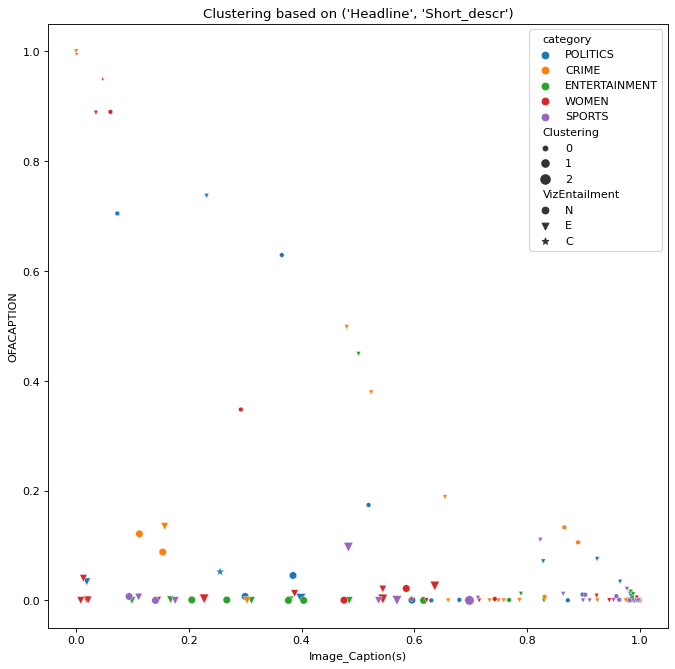

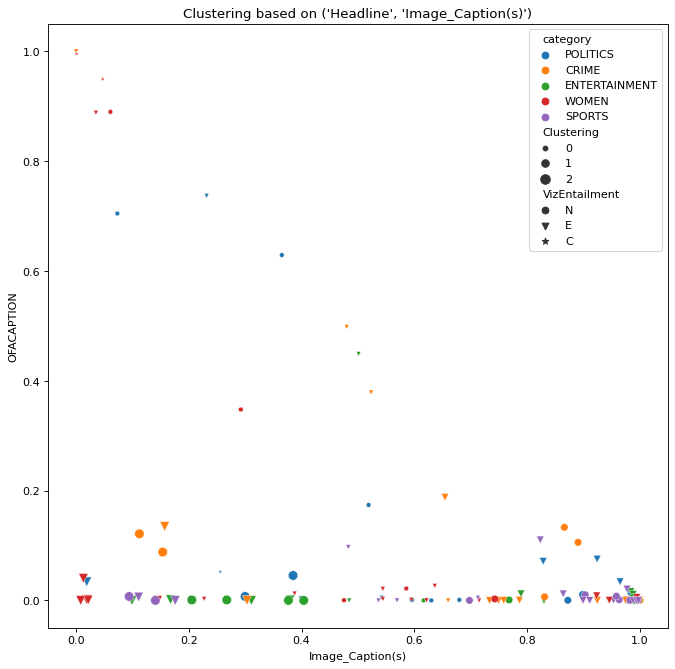

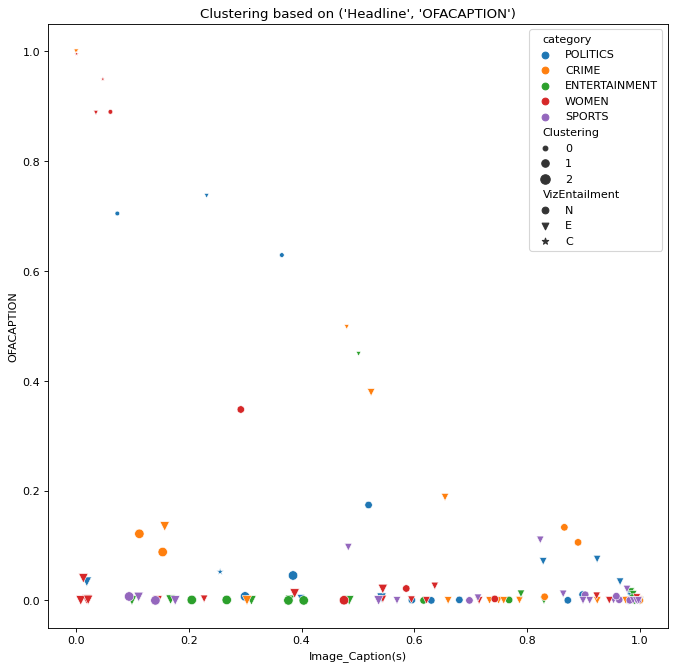

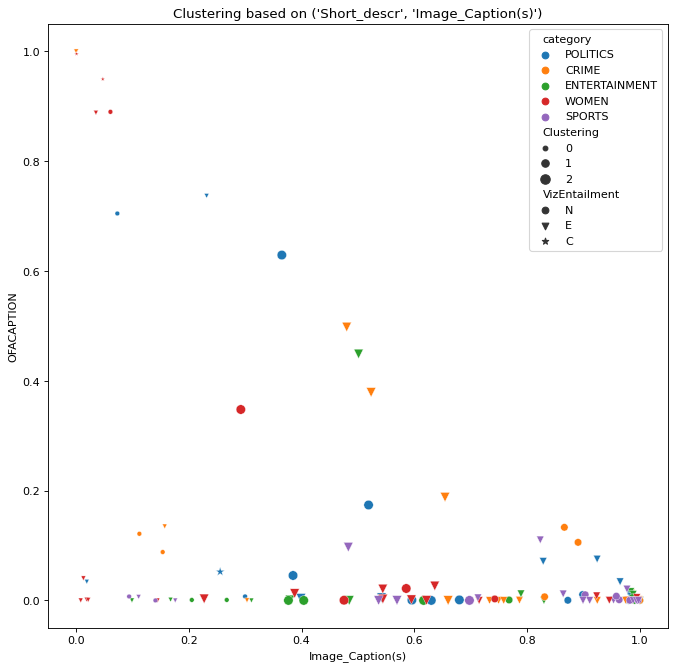

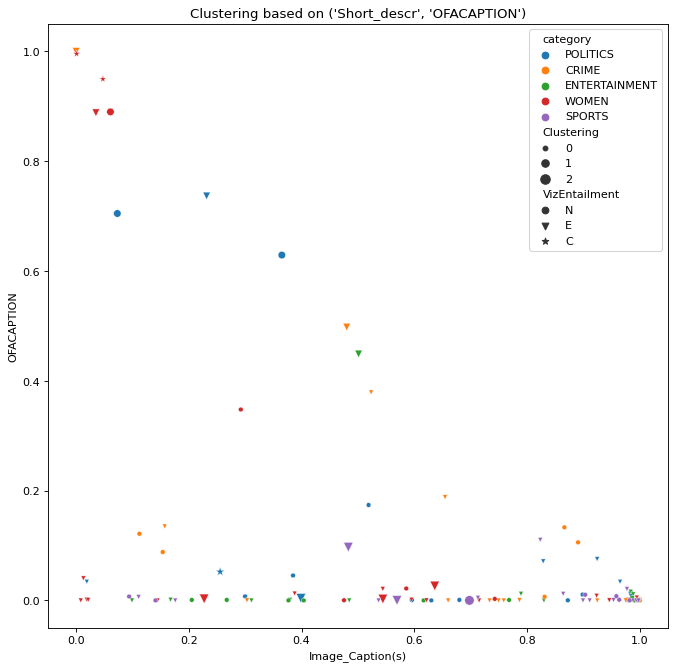

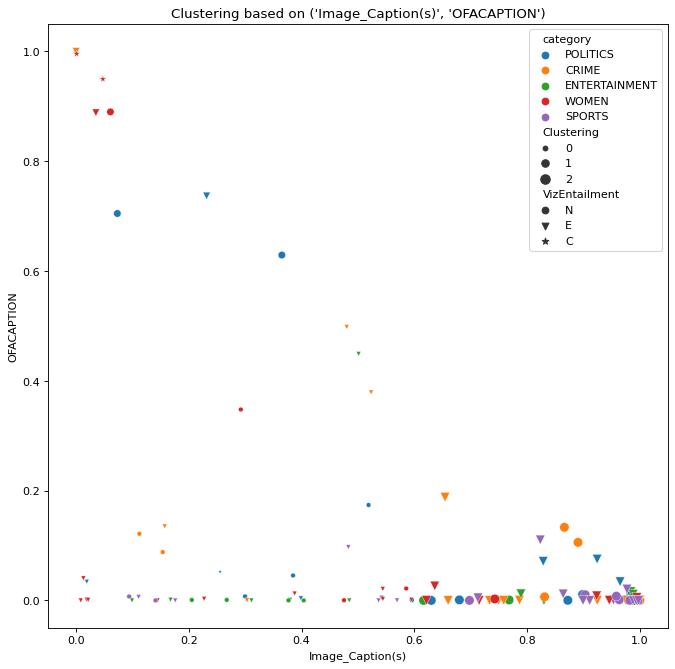

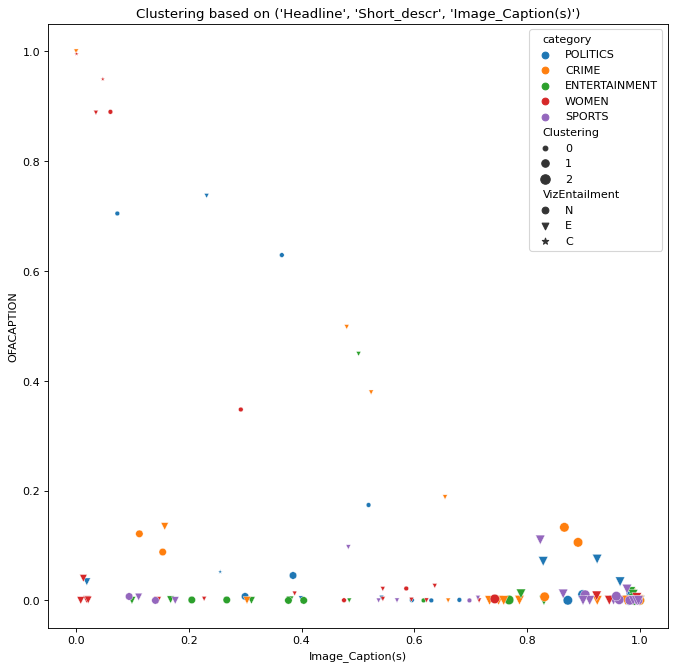

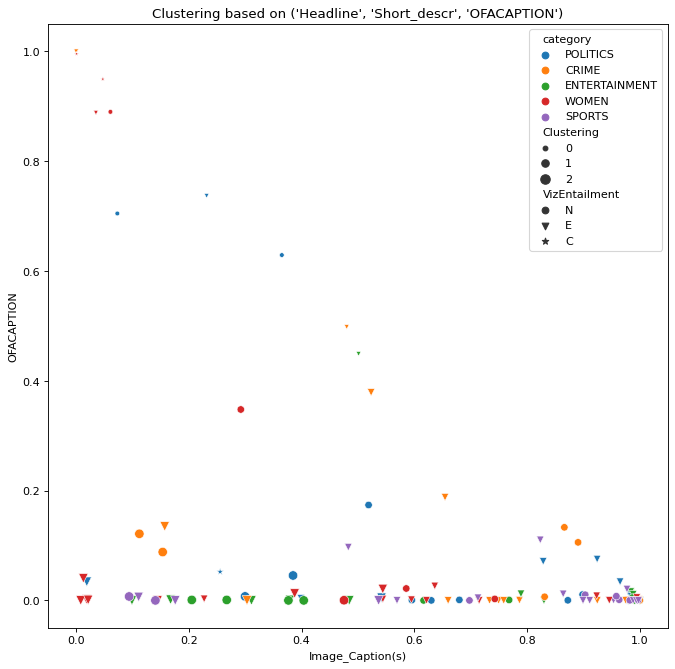

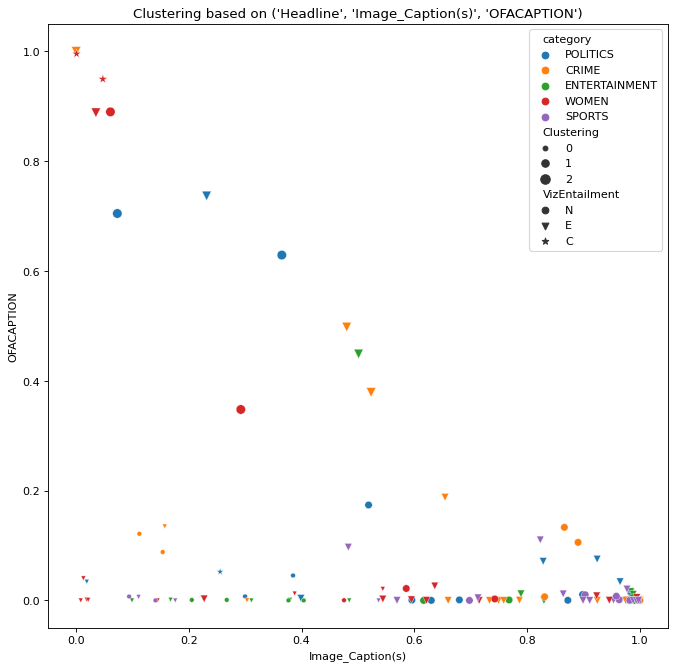

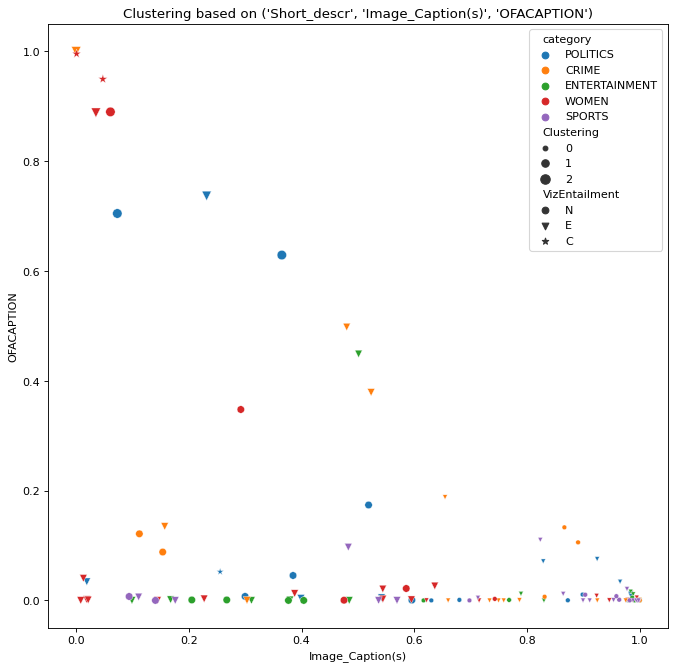

In [66]:
for i in combis:
    km = KMeans(n_clusters=3)
    columns = list(i)
    y_predicted = km.fit_predict(df[columns]) 
    print(km.inertia_) 
    df['Clustering'] = y_predicted

    fig = figure(figsize=(10,10), dpi=80)
    sns.scatterplot(data=df, x="Image_Caption(s)", y="OFACAPTION", style="VizEntailment", size='Clustering', markers=['o', 'v', '*'], hue="category", s=500).set(title="Clustering based on " + str(i))




2.429535967198306
4.595450873056466
2.7864874550400875
2.8408023336928694
1.1347813006853142
3.585122662271414
6.279782289072134
4.751114622517904
6.925043536951967
5.431944216308253


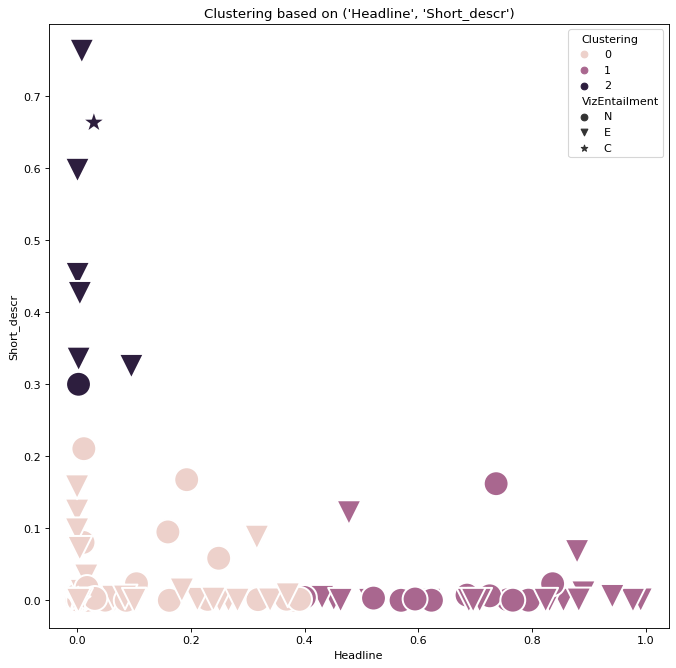

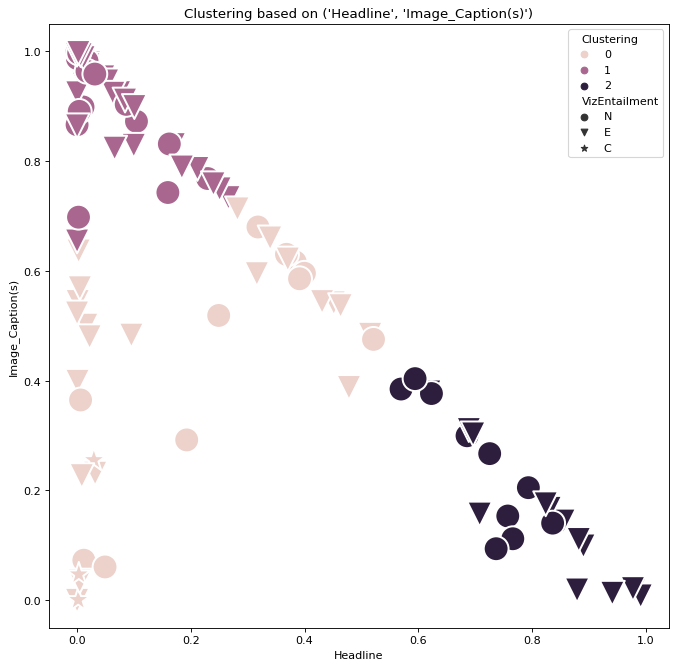

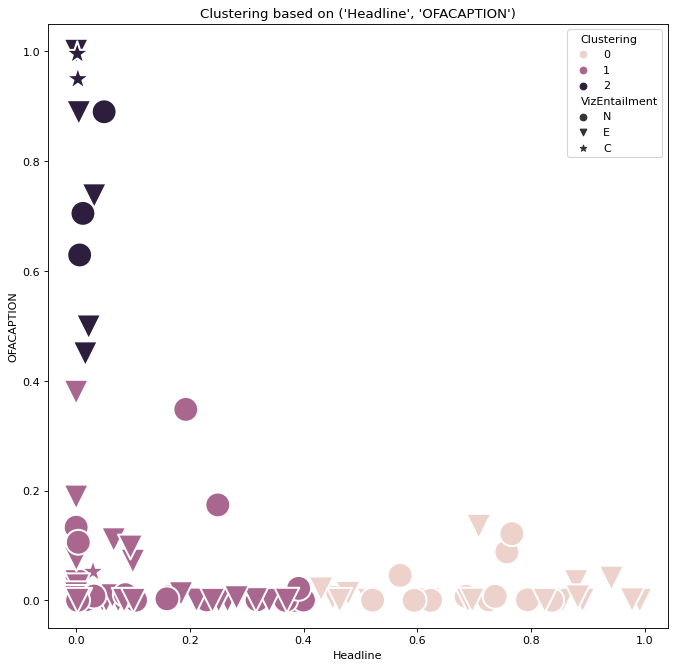

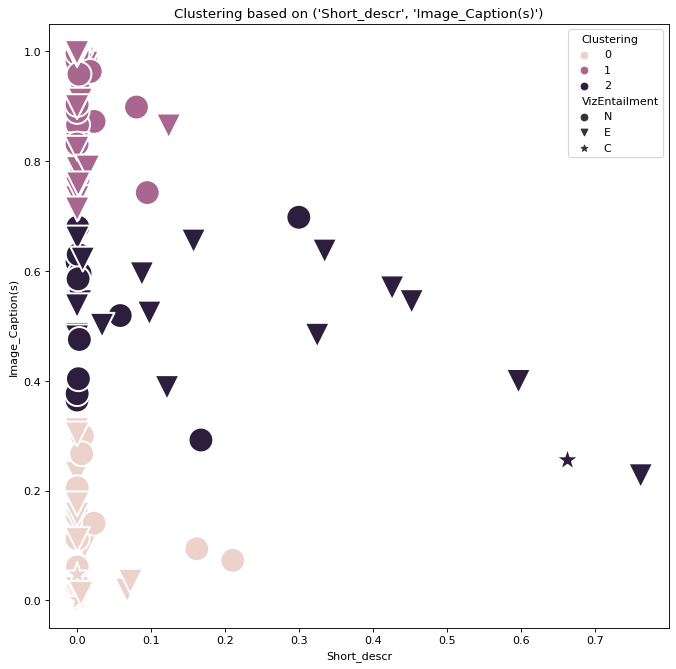

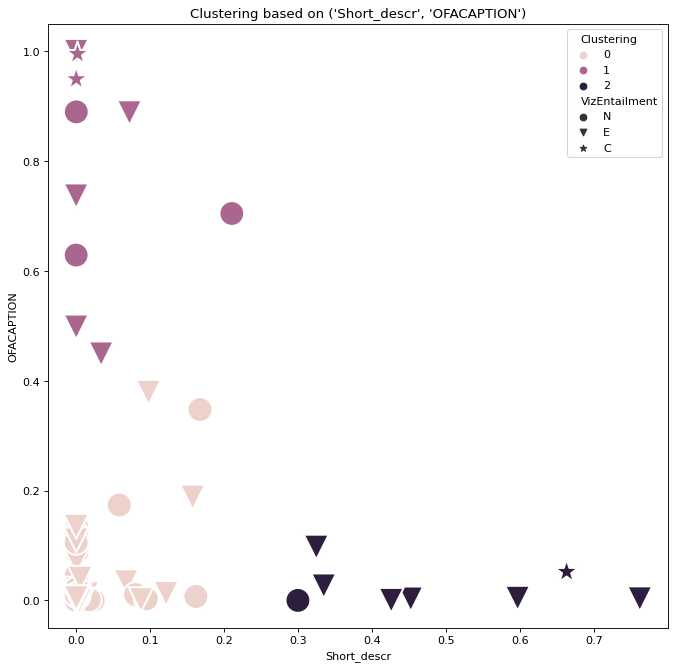

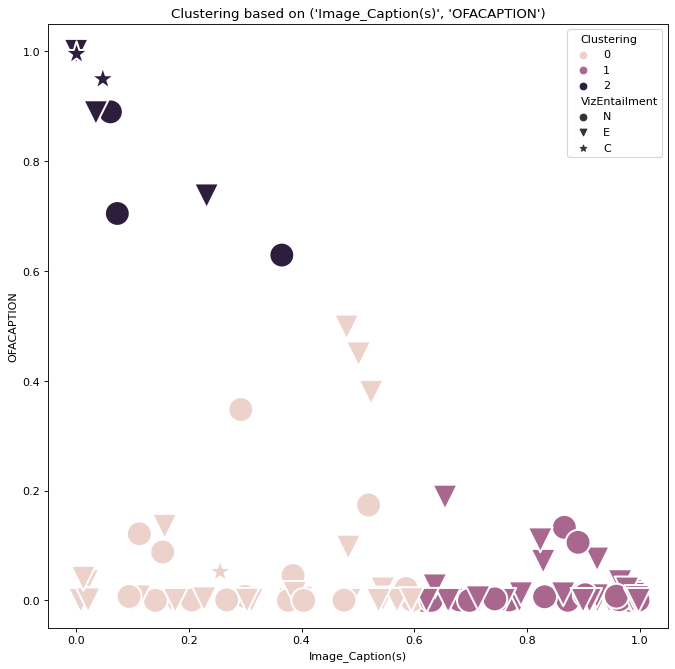

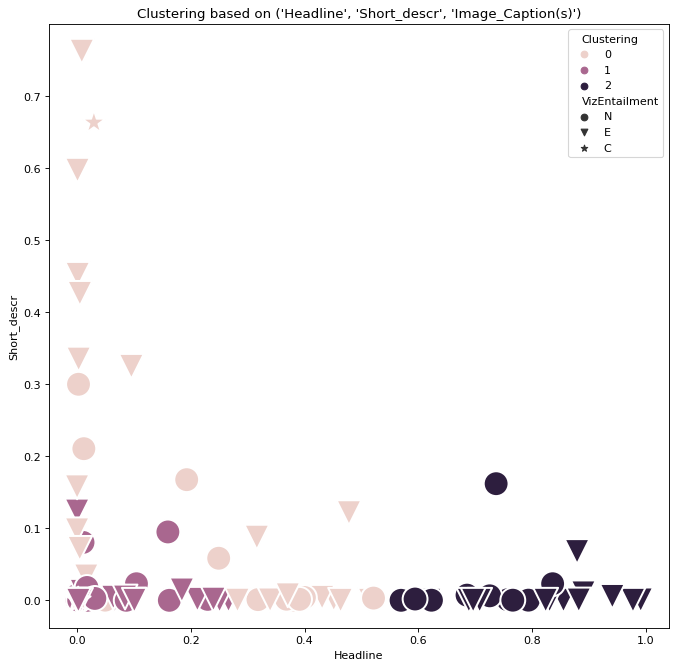

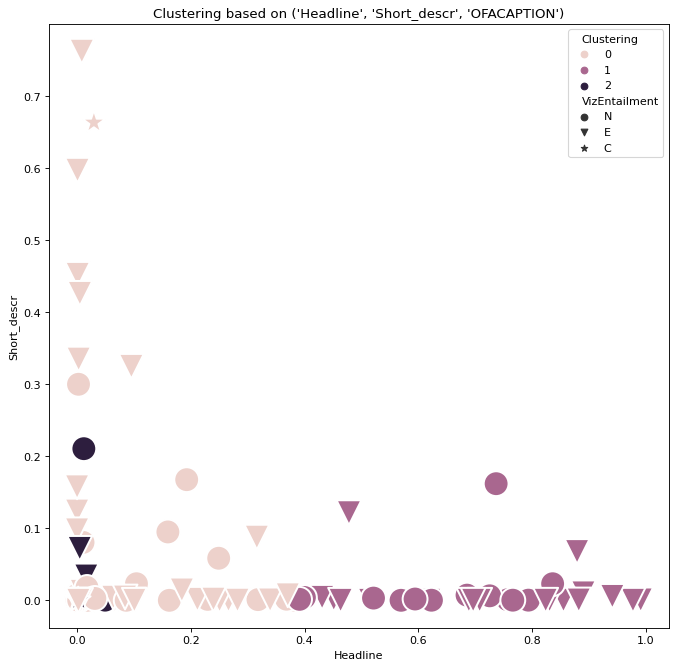

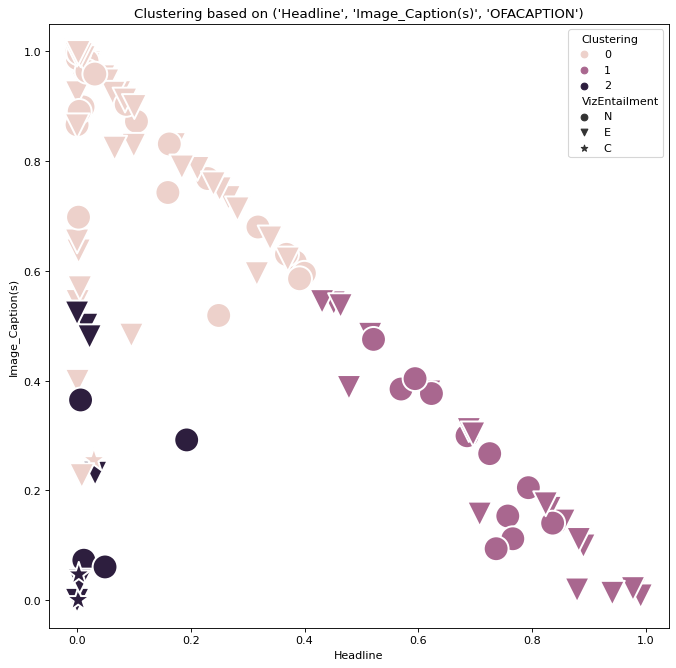

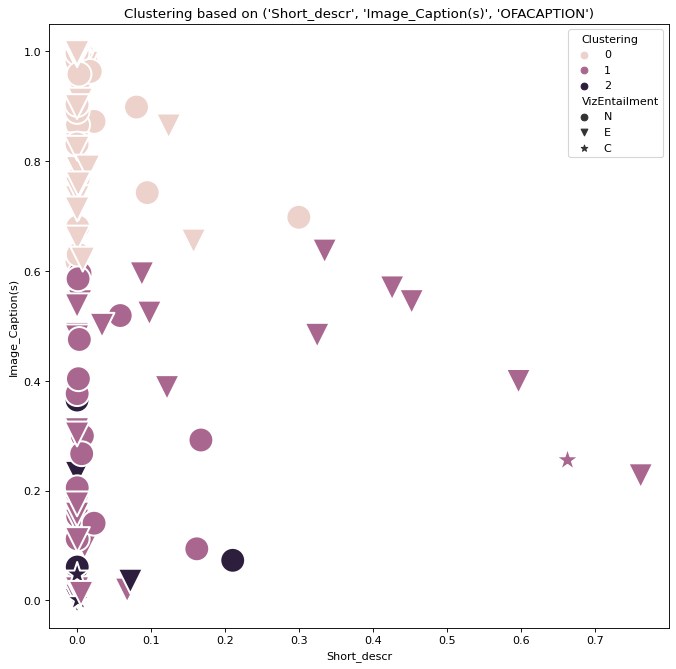

In [63]:
for i in combis:
    km = KMeans(n_clusters=3)
    columns = list(i)
    y_predicted = km.fit_predict(df[columns]) 
    print(km.inertia_) 
    df['Clustering'] = y_predicted

    fig = figure(figsize=(10,10), dpi=80)
#     sns.scatterplot(data=df, x="Image_Caption(s)", y="OFACAPTION", style="VizEntailment", size='Clustering', markers=['o', 'v', '*'], hue="category", s=500).set(title="Clustering based on " + str(i))
    sns.scatterplot(data=df, x=columns[0], y=columns[1], style="VizEntailment", markers=['o', 'v', '*'], hue="Clustering", s=500).set(title="Clustering based on " + str(i))

